# INGESTA DE DATOS


In [ ]:
!pip install opendatasets
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,recall_score, f1_score,accuracy_score

# Dataset
Para este notebook se trabajara con un dataset llamado Mushroom Classification, el cual consiste en un dataset de hongos el cual en base a las diferentes caracteristicas de los hogos saber si es comestible o venenoso, para esto vamos a proceder a usar un algoritmo de clasificacíon.

In [ ]:
datasetlink = "https://www.kaggle.com/datasets/uciml/mushroom-classification"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 34.2k/34.2k [00:00<00:00, 19.3MB/s]

In [ ]:
os.chdir("mushroom-classification")
os.listdir()

['mushrooms.csv']

In [186]:
archivo = "mushrooms.csv"
df = pd.read_csv(archivo)

# Valor de las características
Hacemos una inspección de los datos y lo que pudomos ver es que son bastante caracteristicas, ademas decir que toda la información acerca de lo que es cada valor la dejare aqui:About this file
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [187]:
df.shape

(8124, 23)

In [188]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [190]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [191]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#Graficos explicando la distribución
estos graficos muestran bastante bien como se distribuyen los datos, el codigo de abajo aun es un poco complejo para mi por lo cual le doy gracias a WAEL AKKAD por proporcionarme parte de su codigo para poder demostrar la distribución del dataset.

In [192]:
# function to create stacked countplots to gain insights:
def stacked_countplots_with_target(dataframe, target_column):
    num_columns = len(dataframe.columns) - 1
    num_plots_per_row = 4
    num_rows = (num_columns - 1) // num_plots_per_row + 1

    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))

    # giving custom colors for edible (e) and poisonous (p) mushrooms:
    custom_colors = {'e': 'green', 'p': 'red'}

    for index, column in enumerate(dataframe.columns[1:]):  # Exclude the target column
        row = index // num_plots_per_row
        col = index % num_plots_per_row
        ax = axes[row, col]

        cross_tab = pd.crosstab(dataframe[column], dataframe[target_column])
        stacked_bar = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=[custom_colors.get(x, 'gray') for x in cross_tab.columns])
        ax.set_title(f'{column} with respect to {target_column}')

        # Adding legend with custom labels for edible and poisonous:
        edible_patch = plt.Rectangle((0,0), 1, 1, fc='green')
        poisonous_patch = plt.Rectangle((0,0), 1, 1, fc='red')
        ax.legend([edible_patch, poisonous_patch], ['Edible', 'Poisonous'])

    # Removing any empty subplots if the number of columns is not a multiple of 4:
    if num_columns % num_plots_per_row != 0:
        for i in range(num_columns % num_plots_per_row, num_plots_per_row):
            fig.delaxes(axes[-1, i])

    plt.tight_layout()
    plt.show()

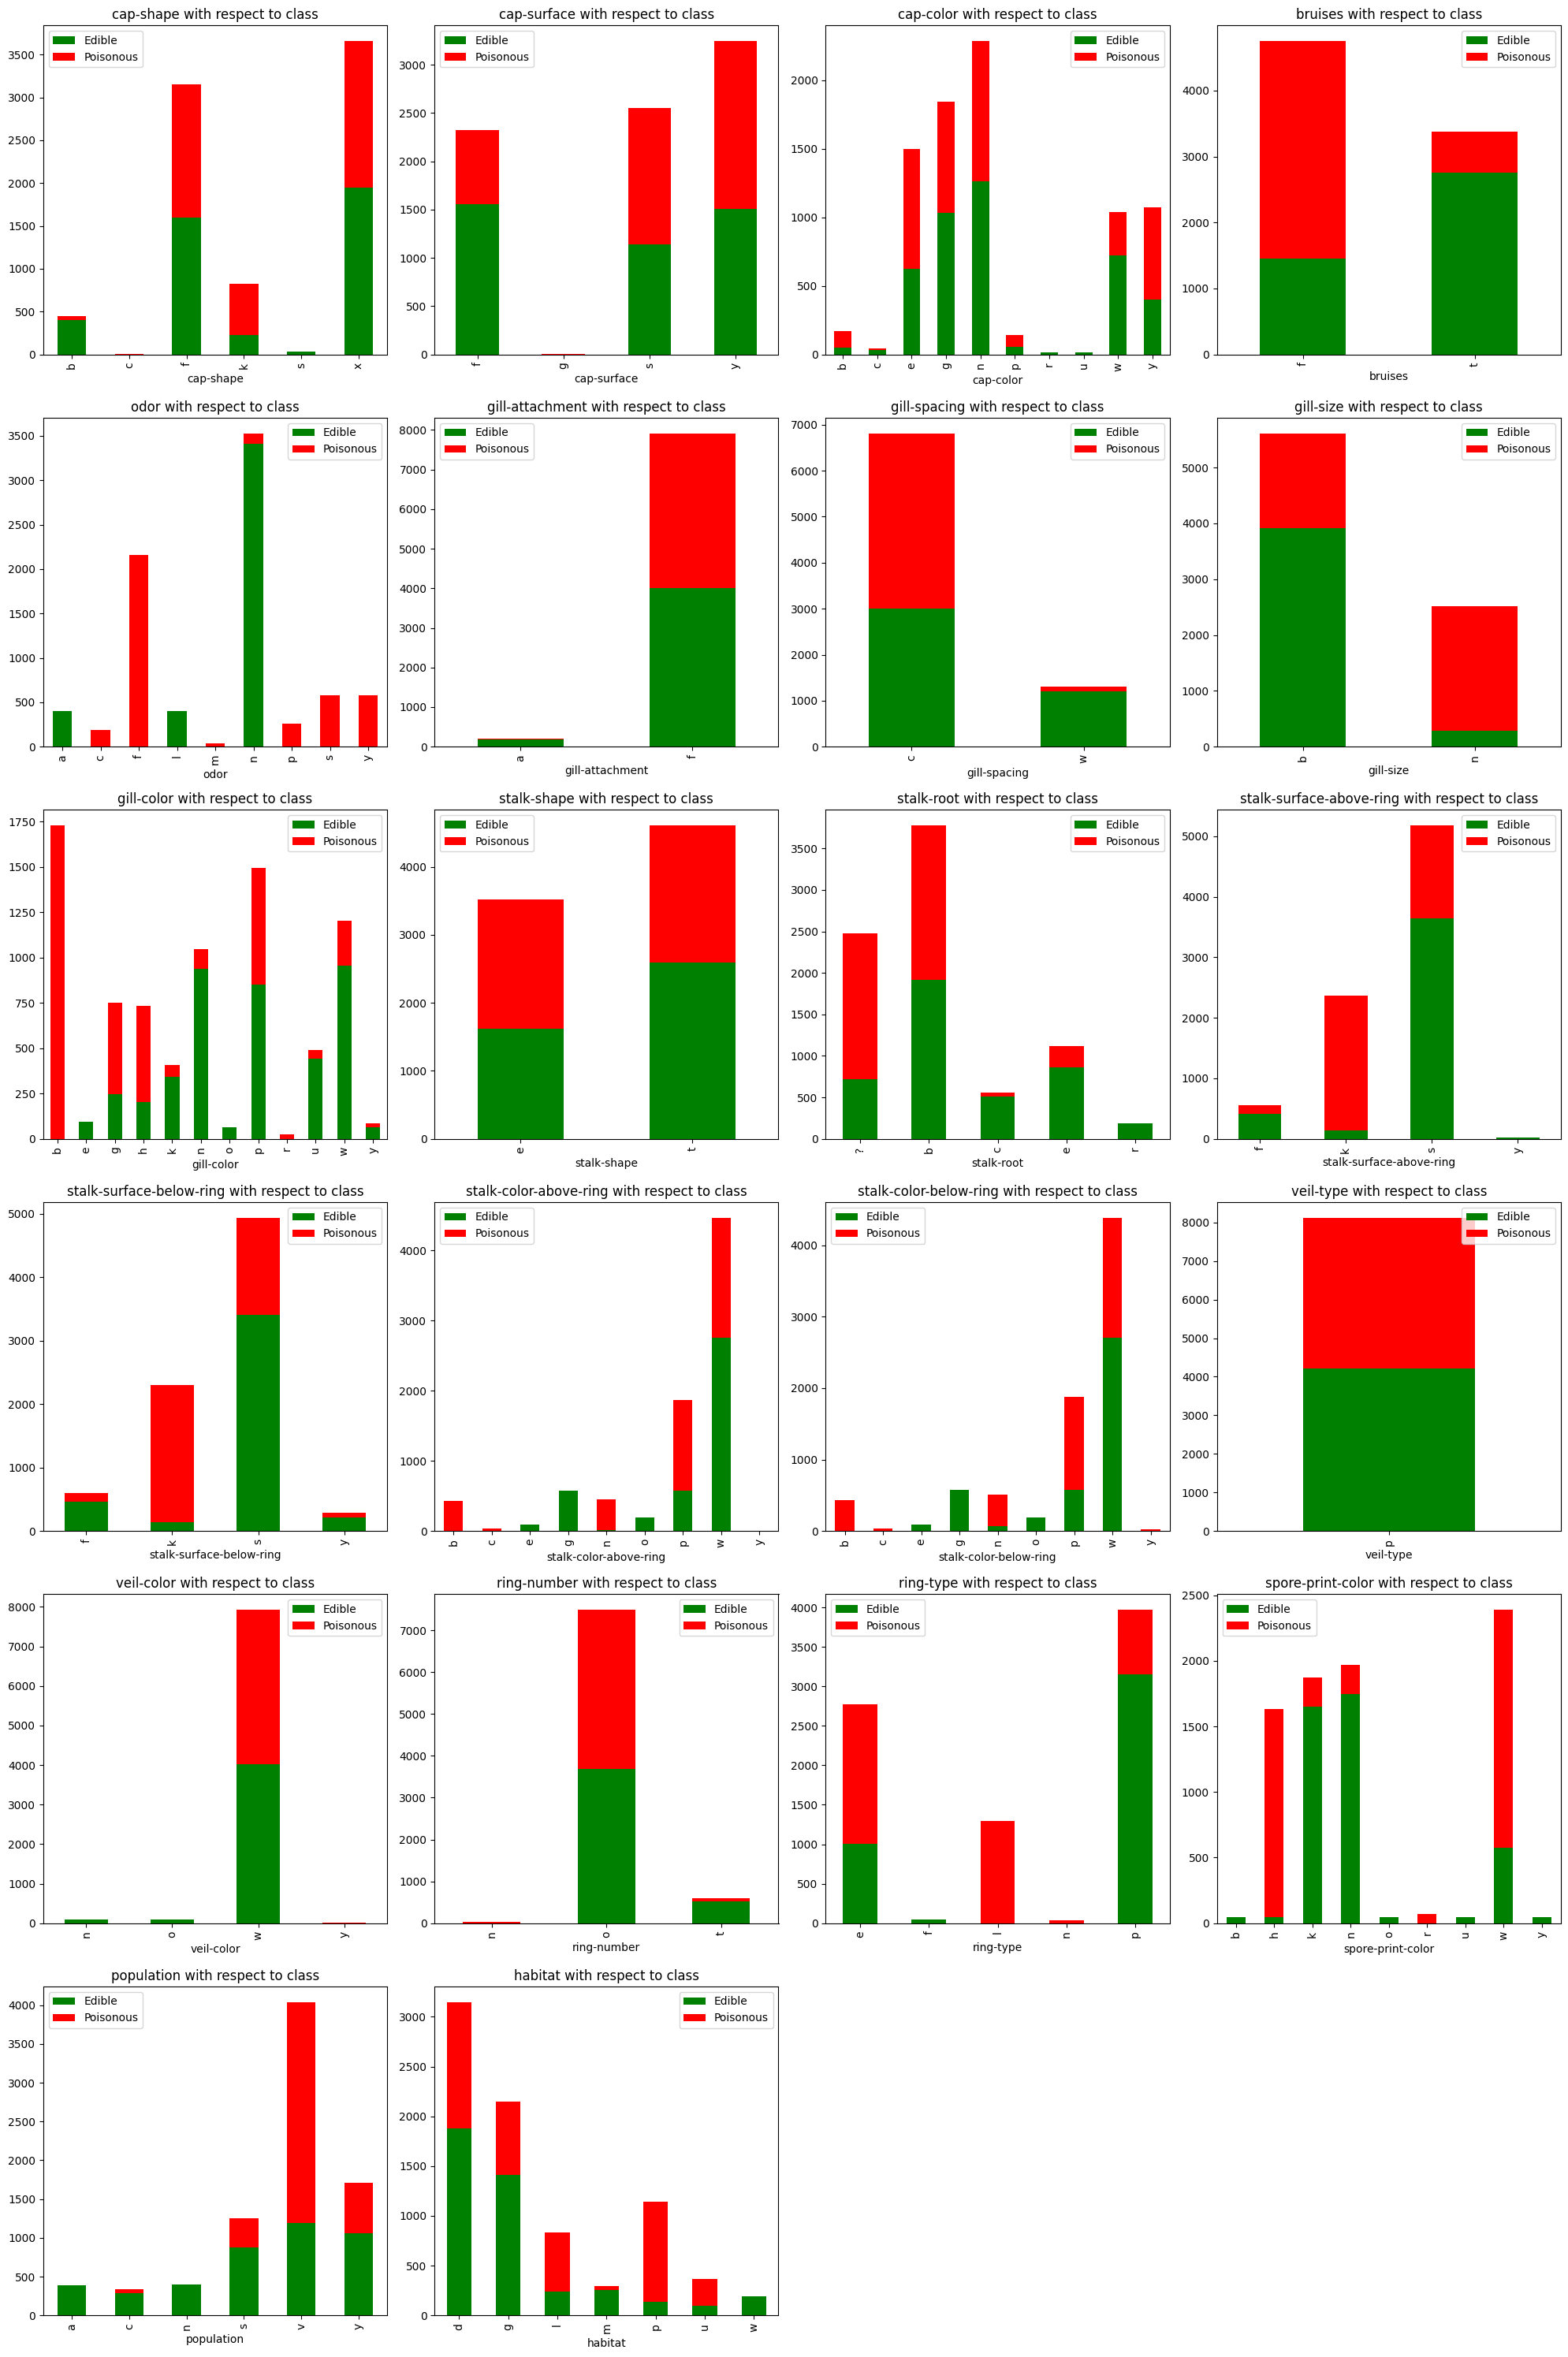

In [193]:
stacked_countplots_with_target(df, 'class')

#Dividimos los datos
Esto para tener claro cual es nuestra variable a predecir y nuestras caracteristicas predictoras

In [194]:
X = df.drop(columns='class')
y = df['class']

In [195]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


#Preprocesamiento
Hacemos uso del algoritmo de preprocesamiento label encoder que lo que va a hacer es convertir cada categoria en un numero entero que represente esa categoria y esto para todas las columnas del dataset X, esto para que el algoritmo pueda funcionar de una manera optima.

In [196]:
Encoder_x = LabelEncoder()

for i in X.columns:
    X[i] = Encoder_x.fit_transform(X[i])
Encoder_y = LabelEncoder()
Encoder_y.fit_transform(y)

array([1, 0, 0, ..., 0, 1, 0])

In [197]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


#ONE HOT ENCODIG
Aplicamos otro metodo de preprocesamiento de los datos , pero este es diferente ya que one hot encoding va a crear una columna por cada categoria, esto para facilitar aun mas al modelo la comprension de los datos.

In [204]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)

In [205]:
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#Dividimos los datos
Dividimos los datos en datos de entrenamiento y datos de prueba, ademas de esto definimos que el conjuto de prueba sea del 25% del dataset original y el otro 75% sera para el entrenamiento, ademas definimos un random state que nos va a ayudar a reproducir el modelo.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=25,random_state=42)

#RANDOM FOREST CLASSIFIER

In [207]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

#Metricas del random forest classifier

In [214]:
accuracy = accuracy_score(y_test, rfc_predict)
accuracy

1.0

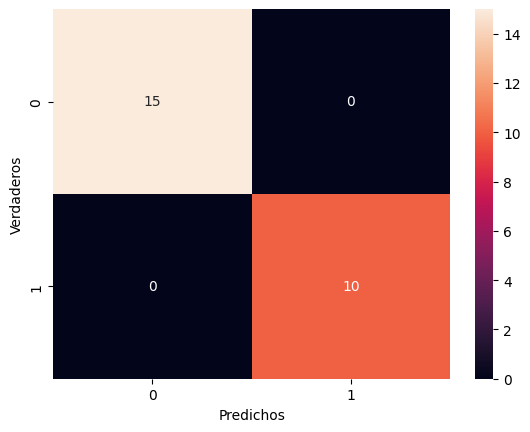

In [208]:
#hacemos la matriz de confusion
cm = confusion_matrix(y_test, rfc_predict)
sns.heatmap(cm, annot=True )
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# Decision tree classifier

In [210]:
ds_model = DecisionTreeClassifier()
ds_model.fit(X_train, y_train)
dsc_pred = ds_model.predict(X_test)

# Metricas del Decision tree classifier

In [215]:
accuracy = accuracy_score(y_test, dsc_pred)
accuracy

1.0

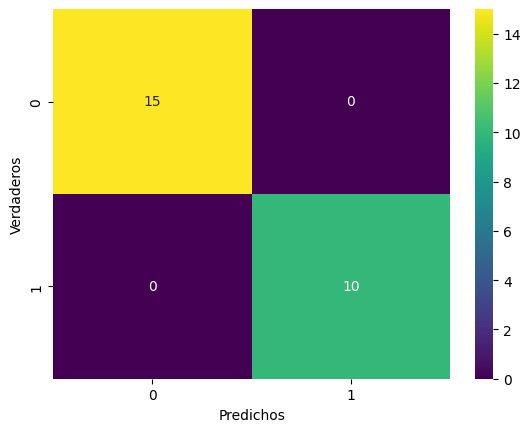

In [218]:
#hacemos la matriz de confusion
cm = confusion_matrix(y_test, dsc_pred)
sns.heatmap(cm, annot=True, cmap='viridis' )
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()